In [140]:
library(MsBackendHmdb)
library(Spectra)

In [9]:
# load the functions file
source("/Users/mahnoorzulfiqar/OneDriveUNI/MAW/Workflow_R_Functions.r")


Attache Paket: ‘MsCoreUtils’


Die folgenden Objekte sind maskiert von ‘package:Spectra’:

    bin, smooth


Die folgenden Objekte sind maskiert von ‘package:ProtGenerics’:

    bin, smooth


Das folgende Objekt ist maskiert ‘package:stats’:

    smooth



Attache Paket: ‘dplyr’


Das folgende Objekt ist maskiert ‘package:MsCoreUtils’:

    between


Die folgenden Objekte sind maskiert von ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


Die folgenden Objekte sind maskiert von ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union



Attache Paket: ‘rvest’


Das folgende Objekt ist maskiert ‘package:readr’:

    guess_encoding


Lade nötiges Paket: Rcpp



In [3]:
load("/Users/mahnoorzulfiqar/OneDriveUNI/Standards/hmdb.rda")

In [141]:
# read the spectra
sps_all <- Spectra("/Users/mahnoorzulfiqar/OneDriveUNI/MAW-data/MTBLS709_Data_32/pos_05_summer_Polstr_5_1-A-5_01_17174.mzML",
                       backend = MsBackendMzR())
sps_all <- filterEmptySpectra(sps_all)
#' Extract Precursor m/z(s) in each file
pre_mz <- unique(precursorMz(sps_all))
#' Remove any NAs
pre_mz <- na.omit(pre_mz)

In [142]:
pre_mz_interest = 285.07858276

In [143]:
sps <- spec2_Processing(285.07858276, sps_all, spec = "spec_all", ppmx=15)
sps

MSn data (Spectra) with 7 spectra in a MsBackendMzR backend:
    msLevel     rtime scanIndex
  <integer> <numeric> <integer>
1         2   537.897      1577
2         2   538.576      1579
3         2   539.255      1581
4         2   539.933      1583
5         2   540.612      1585
6         2   541.290      1587
7         2   541.969      1589
 ... 33 more variables/columns.

file(s):
pos_05_summer_Polstr_5_1-A-5_01_17174.mzML
Lazy evaluation queue: 2 processing step(s)
Processing:
 Filter: removed empty spectra. [Tue Aug 23 15:20:33 2022]
 Filter: select spectra with precursor m/z matching 285.081433545828, 285.081433545828 [Tue Aug 23 15:20:33 2022]
 Remove peaks based on their intensities and a user-provided function in spectra of MS level(s) 2. [Tue Aug 23 15:20:33 2022] 

In [144]:
hmdb_with_mz <- spec2_Processing(285.07858276, hmdb, spec = "hmdb", ppmx=15)
hmdb_with_mz

MSn data (Spectra) with 1372 spectra in a MsBackendHmdbXml backend:
       msLevel     rtime scanIndex
     <integer> <numeric> <integer>
1            2        NA        NA
2            2        NA        NA
3            2        NA        NA
4            2        NA        NA
5            2        NA        NA
...        ...       ...       ...
1368         2        NA        NA
1369         2        NA        NA
1370         2        NA        NA
1371         2        NA        NA
1372         2        NA        NA
 ... 21 more variables/columns.
Lazy evaluation queue: 2 processing step(s)
Processing:
 Remove peaks based on their intensities and a user-provided function in spectra of MS level(s) 2. [Tue Aug 23 15:20:44 2022] 

In [145]:
res <- compareSpectra(sps, hmdb_with_mz)
res_top <- which(res > res[res>0.75], arr.ind = TRUE)

In [146]:
res_topdf <- data.frame(res_top)
# to store the scores to add to res_topdf
hmdb_scores <- c()
# for all rows and columns in res_topdf
for (i in 1:nrow(res_topdf)){

    # store the scores
    hmdb_scores <- c(hmdb_scores, res[(res_topdf[i, "row"]), (res_topdf[i, "col"])])
}
# add the score column to res_top
hmdb_res <- cbind(res_top, hmdb_scores)
hmdb_res <- data.frame(hmdb_res)

# sort in descending order
ordered_hmdb_res <- hmdb_res[order(-hmdb_res[,"hmdb_scores"]),]
df_ord_hmdb_res <- data.frame(ordered_hmdb_res)


In [147]:
idv <- df_ord_hmdb_res[1,]
df_peaklists <- peakdf(hmdb_with_mz[idv[[2]]], sps[idv[[1]]], ppmx = 15)

In [148]:
#' Specifying a function to draw peak labels
label_fun <- function(x) {
    ints <- unlist(intensity(x))
    mzs <- format(unlist(mz(x)), digits = 4)
    mzs[ints < 5] <- ""
    mzs
}

null device 
          1

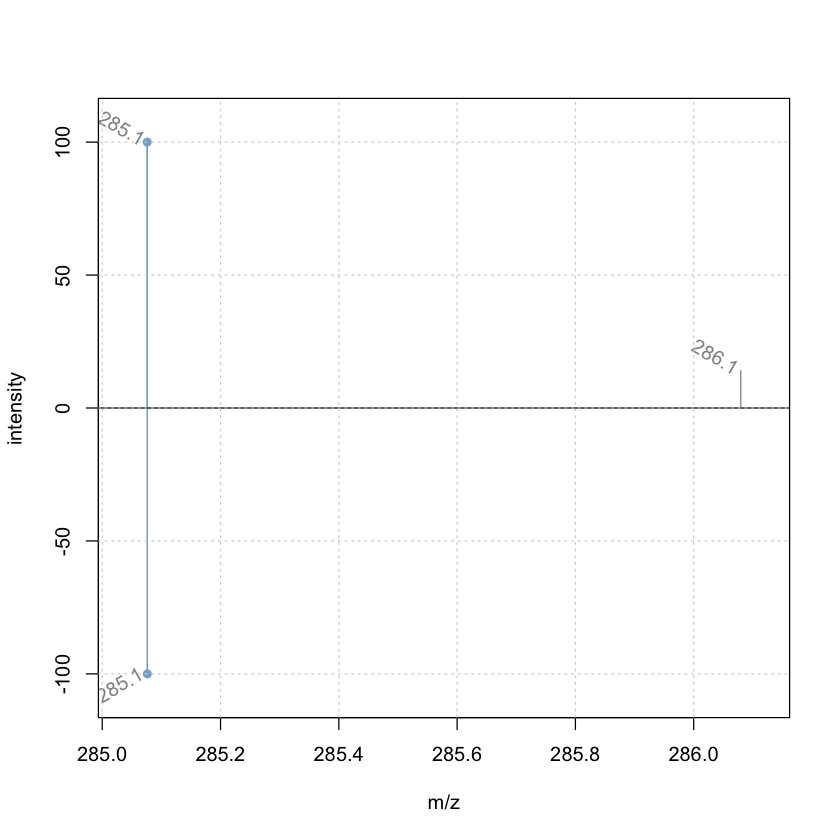

In [149]:
plotSpectraMirror(sps[idv[[1]]], hmdb_with_mz[idv[[2]]], tolerance = 0.2,
                    labels = label_fun, labelPos = 2, labelOffset = 0.2,
                    labelSrt = -30)
grid()
dev.off()

In [150]:
df_peaklists

mz.y,intensity.y,mz.z,intensity.z,diff
285.076,100,285.0763,100,0


In [109]:
load("/Users/mahnoorzulfiqar/OneDriveUNI/Standards/mbankNIST.rda")

In [110]:
mbank_with_mz <- spec2_Processing(285.07858276, mbank, spec = "mbank", ppmx=15)
mbank_with_mz

MSn data (Spectra) with 542 spectra in a MsBackendMsp backend:
      msLevel     rtime scanIndex
    <integer> <numeric> <integer>
1           2         0        NA
2           2         0        NA
3           2         0        NA
4           2         0        NA
5           2         0        NA
...       ...       ...       ...
538         2         0        NA
539         2         0        NA
540         2         0        NA
541         2         0        NA
542         2         0        NA
 ... 21 more variables/columns.
Lazy evaluation queue: 2 processing step(s)
Processing:
 Remove peaks based on their intensities and a user-provided function in spectra of MS level(s) 2. [Tue Aug 23 14:34:23 2022] 

In [111]:
res <- compareSpectra(sps, mbank_with_mz)
res_top <- which(res > res[res>0.75], arr.ind = TRUE)

In [112]:
res_topdf <- data.frame(res_top)
# to store the scores to add to res_topdf
hmdb_scores <- c()
# for all rows and columns in res_topdf
for (i in 1:nrow(res_topdf)){

    # store the scores
    hmdb_scores <- c(hmdb_scores, res[(res_topdf[i, "row"]), (res_topdf[i, "col"])])
}
# add the score column to res_top
hmdb_res <- cbind(res_top, hmdb_scores)
hmdb_res <- data.frame(hmdb_res)

# sort in descending order
ordered_hmdb_res <- hmdb_res[order(-hmdb_res[,"hmdb_scores"]),]
df_ord_hmdb_res <- data.frame(ordered_hmdb_res)


In [113]:
df_ord_hmdb_res

,row,col,hmdb_scores
,<dbl>,<dbl>,<dbl>
3,3,18,0.8767286
10,3,57,0.8767286
17,3,131,0.8767286
24,3,162,0.8767286
31,3,169,0.8767286
38,3,278,0.8767286
45,3,302,0.8767286
52,3,345,0.8767286
59,3,381,0.8767286


In [114]:
mbank_with_mz[399]

MSn data (Spectra) with 1 spectra in a MsBackendMsp backend:
    msLevel     rtime scanIndex
  <integer> <numeric> <integer>
1         2         0        NA
 ... 21 more variables/columns.
Lazy evaluation queue: 2 processing step(s)
Processing:
 Remove peaks based on their intensities and a user-provided function in spectra of MS level(s) 2. [Tue Aug 23 14:34:23 2022] 

null device 
          1

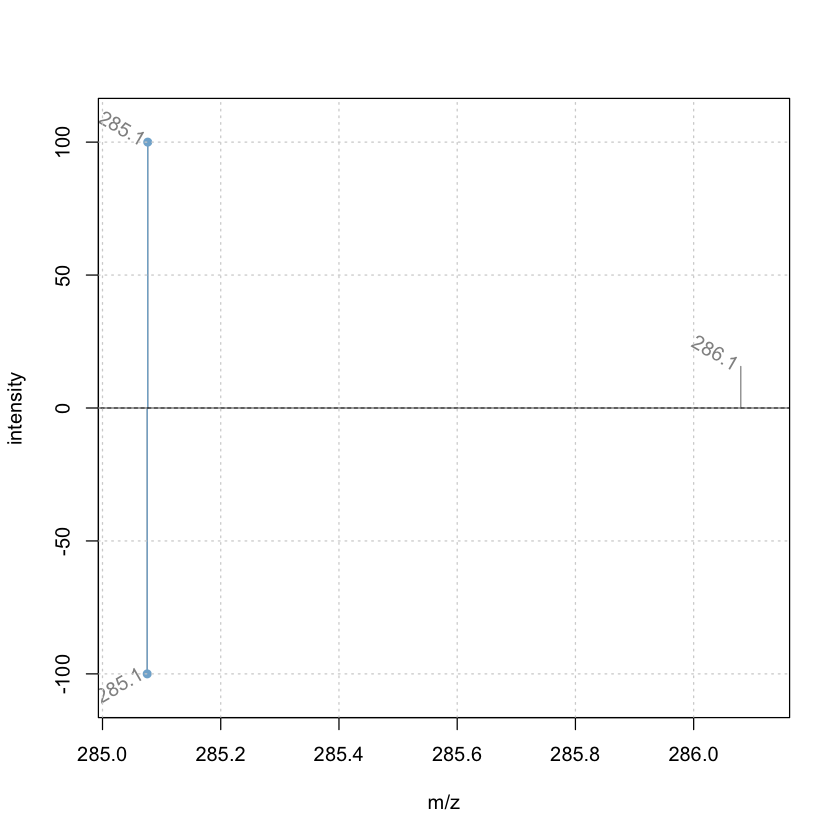

In [115]:
plotSpectraMirror(sps[idv[[1]]], mbank_with_mz[399], tolerance = 0.2,
                    labels = label_fun, labelPos = 2, labelOffset = 0.2,
                    labelSrt = -30)
grid()
dev.off()

In [116]:
df_peaklists <- peakdf(mbank_with_mz[399], sps[idv[[1]]], ppmx = 15)
df_peaklists

mz.y,intensity.y,mz.z,intensity.z,diff
285.0765,100,285.0756,100,0


In [119]:
load("/Users/mahnoorzulfiqar/OneDriveUNI/Standards/gnps.rda")

In [120]:
gnps_with_mz <- spec2_Processing(285.07858276, gnpsdb, spec = "gnps", ppmx=15)
gnps_with_mz

MSn data (Spectra) with 7523 spectra in a MsBackendMgf backend:
       msLevel     rtime scanIndex
     <integer> <numeric> <integer>
1            2        NA        NA
2            2        NA        NA
3            2        NA        NA
4            2        NA        NA
5            2        NA        NA
...        ...       ...       ...
7519         2        NA        NA
7520         2        NA        NA
7521         2        NA        NA
7522         2        NA        NA
7523         2        NA        NA
 ... 32 more variables/columns.
Lazy evaluation queue: 2 processing step(s)
Processing:
 Remove peaks based on their intensities and a user-provided function in spectra of MS level(s) 2. [Tue Aug 23 14:38:57 2022] 

In [121]:
res <- compareSpectra(sps, gnps_with_mz, ppm = 15, FUN = MsCoreUtils::gnps, MAPFUN = joinPeaksGnps)

In [122]:
res_top <- which(res > res[res>0.85], arr.ind = TRUE)

In [123]:
res_topdf <- data.frame(res_top)
# to store the scores to add to res_topdf
hmdb_scores <- c()
# for all rows and columns in res_topdf
for (i in 1:nrow(res_topdf)){

    # store the scores
    hmdb_scores <- c(hmdb_scores, res[(res_topdf[i, "row"]), (res_topdf[i, "col"])])
}
# add the score column to res_top
hmdb_res <- cbind(res_top, hmdb_scores)
hmdb_res <- data.frame(hmdb_res)

# sort in descending order
ordered_hmdb_res <- hmdb_res[order(-hmdb_res[,"hmdb_scores"]),]
df_ord_hmdb_res <- data.frame(ordered_hmdb_res)


In [124]:
df_ord_hmdb_res

,row,col,hmdb_scores
,<dbl>,<dbl>,<dbl>
1747,1,6230,0.9999136
1748,2,6230,0.9997979
1750,4,6230,0.9997937
1752,6,6230,0.9997590
1751,5,6230,0.9996044
1804,3,7491,0.9993368
1753,7,6230,0.9993288
1808,7,7491,0.9992876
1749,3,6230,0.9992793


In [ ]:
2	

null device 
          1

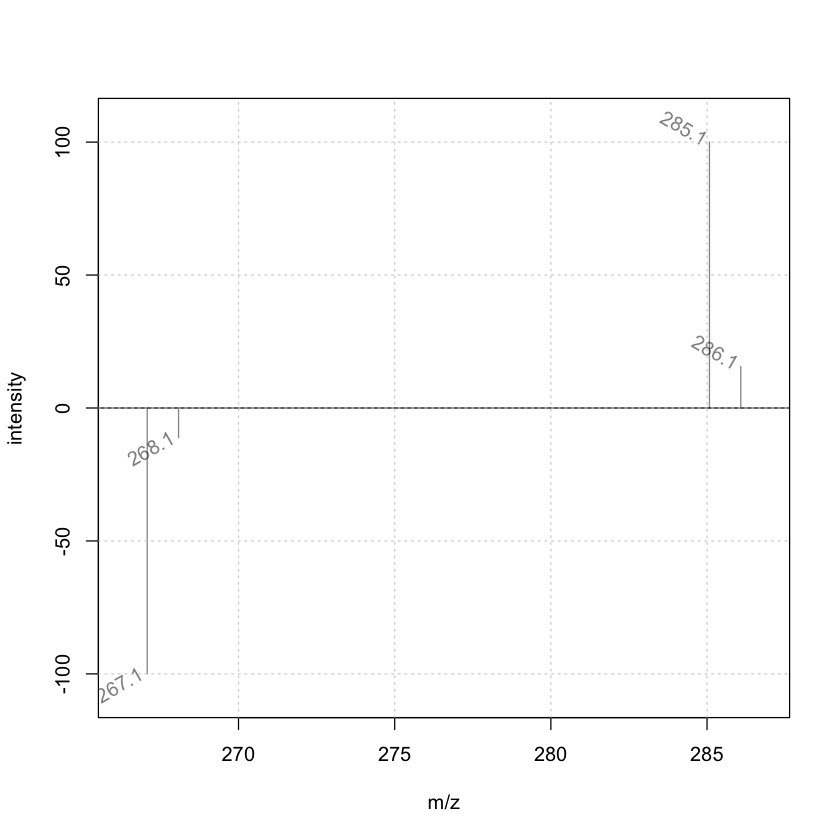

In [126]:
plotSpectraMirror(sps[2], gnps_with_mz[7491], tolerance = 0.2,
                    labels = label_fun, labelPos = 2, labelOffset = 0.2,
                    labelSrt = -30)
grid()
dev.off()

In [130]:
gnps_with_mz[7491]$NAME

[1] "BIOTIN [M+Na]+"

In [128]:
spectraVariables(gnps_with_mz)

[1] "msLevel"                 "rtime"                  
 [3] "acquisitionNum"          "scanIndex"              
 [5] "dataStorage"             "dataOrigin"             
 [7] "centroided"              "smoothed"               
 [9] "polarity"                "precScanNum"            
[11] "precursorMz"             "precursorIntensity"     
[13] "precursorCharge"         "collisionEnergy"        
[15] "isolationWindowLowerMz"  "isolationWindowTargetMz"
[17] "isolationWindowUpperMz"  "MSLEVEL"                
[19] "SOURCE_INSTRUMENT"       "FILENAME"               
[21] "SEQ"                     "IONMODE"                
[23] "ORGANISM"                "NAME"                   
[25] "PI"                      "DATACOLLECTOR"          
[27] "SMILES"                  "INCHI"                  
[29] "INCHIAUX"                "PUBMED"                 
[31] "SUBMITUSER"              "LIBRARYQUALITY"         
[33] "SPECTRUMID"